In [1]:
import sys
sys.path.append('../Modules')

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from DesignMat import Polynomial
from Regressor import Variational

def create_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def cubic(x):
    return x * (x - 5) * (x + 5)

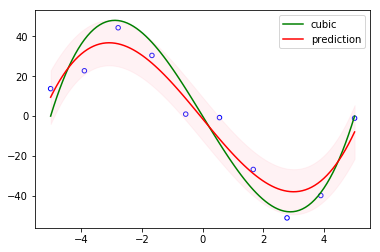

In [2]:
x_train, t_train = create_data(cubic, 10, 10., [-5, 5])
x = np.linspace(-5, 5, 100)
t = cubic(x)

X_train = Polynomial(3).dm(x_train)
X = Polynomial(3).dm(x)

vlr = Variational(beta=0.01)
vlr.fit(X_train, t_train)
t_mean, t_std = vlr.predict(X, return_std=True)

plt.scatter(x_train, t_train, s=20, facecolor="none", edgecolor="b")
plt.plot(x, t, c="g", label="cubic")
plt.plot(x, t_mean, c="r", label="prediction") 
plt.fill_between(x, t_mean - t_std, t_mean + t_std, alpha=0.2, color="pink")
plt.legend()
plt.show()